# Scrapping Data


In [ ]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 800 kB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.1.0-py3-none-any.whl size=24585 sha256=0486807cb2e93aa2319f949e62091523e3ac1e3b6c809470772fa59f648ca9c0
  Stored in directory: /root/.cache/pip/wheels/f4/fc/13/fc4c30a74f33bdd956248d2a0f022780fce59250a6a2301ad8
Successfully built google-play-scraper


In [ ]:
from google_play_scraper import app

import pandas as pd
import numpy as np

#Scrapping Review TIKTOK

In [ ]:
#US Market tiktok id test

from google_play_scraper import Sort, reviews_all


temp = reviews_all(
    'com.ss.android.ugc.trill',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # get Indonesian Review
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [ ]:
df_tiktok_1= pd.DataFrame(np.array(temp),columns=['review'])
df_tiktok_1 = df_tiktok_1.join(pd.DataFrame(df_tiktok_1.pop('review').tolist()))
df_tiktok_1.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFhWCP_ZYhg6C7TUOpCud2D5w1w5v3cnehobwB...,Ely Vuspita,https://play-lh.googleusercontent.com/a/AATXAJ...,sisi disita khayal insya' Nggak Radcliffe Ushe...,5,0,None,2022-04-11 06:44:51,None,NaT
1,gp:AOqpTOHpOwsdcBZG4NLalocx4TgZL8Pz2ToyOiX8jKp...,Ato Sang Pasukan Ilusi,https://play-lh.googleusercontent.com/a-/AOh14...,Okkkk,5,0,23.9.5,2022-04-11 06:44:50,None,NaT
2,gp:AOqpTOH8YxnFy0h4a_g49dLt7raefmY3b3nhJEzZuqk...,Mamang Gila,https://play-lh.googleusercontent.com/a/AATXAJ...,Bagus bangettttttttttt pokonya,1,0,None,2022-04-11 06:44:32,None,NaT
3,gp:AOqpTOHzJ-osah_oYII8_mKFDvvLUNhL9FFo3dMYAJX...,Vincensius Joko surya gumilang,https://play-lh.googleusercontent.com/a-/AOh14...,Game babi,1,0,None,2022-04-11 06:44:20,None,NaT
4,gp:AOqpTOEuUCXRkYNNUg2CRm1qz7P-KyYQPZY-RqfvZxG...,Redmi Goo,https://play-lh.googleusercontent.com/a/AATXAJ...,Keren,5,0,23.5.3,2022-04-11 06:43:00,None,NaT


In [ ]:
df_tiktok_1.to_csv("Review-Tiktok.csv", index=False)
from google.colab import files
# files.download("Review-Tokopedia.csv")

NameError: ignored

#Pre Processing

In [ ]:
!pip install twint
!pip install sastrawi
!pip install keras
!pip freeze

In [ ]:
import pandas as pd
import re
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')

#!pip install twint
import twint
import nest_asyncio
nest_asyncio.apply()


import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from  tensorflow.keras.optimizers import Adam, RMSprop, SGD

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/...')

In [ ]:
df.isnull().sum()

No          0
reviewId    0
userName    0
content     0
label       0
dtype: int64

In [ ]:
df.dtypes

No           int64
reviewId    object
userName    object
content     object
label       object
dtype: object

In [ ]:
df

,No,reviewId,userName,content,label
0,0,gp:AOqpTOFhWCP_ZYhg6C7TUOpCud2D5w1w5v3cnehobwB...,Ely Vuspita,sisi disita khayal insya' Nggak Radcliffe Ushe...,netral
1,1,gp:AOqpTOHpOwsdcBZG4NLalocx4TgZL8Pz2ToyOiX8jKp...,Ato Sang Pasukan Ilusi,Okkkk,positif
2,2,gp:AOqpTOH8YxnFy0h4a_g49dLt7raefmY3b3nhJEzZuqk...,Mamang Gila,Bagus bangettttttttttt pokonya,positif
3,3,gp:AOqpTOHzJ-osah_oYII8_mKFDvvLUNhL9FFo3dMYAJX...,Vincensius Joko surya gumilang,Game babi,negatif
4,4,gp:AOqpTOEuUCXRkYNNUg2CRm1qz7P-KyYQPZY-RqfvZxG...,Redmi Goo,Keren,positif
...,...,...,...,...,...
49995,49995,gp:AOqpTOFa6V8C93IFNEyXY3iiFufXvvK_E-QnYLJbsQQ...,Fatur Rahman,Gahbisa masuk akun aku,negatif
49996,49996,gp:AOqpTOGLoATFQJ4pLORwJAkkp5wNZ5AhxJfP5eOy039...,Queen Messi,Mantul,positif
49997,49997,gp:AOqpTOHZhaeVemnp82k53cojZ-qfc3ShFma-ld70EcX...,Lubna Sahla,Cakep,positif
49998,49998,gp:AOqpTOG9_WT1xS-VqzTcc6q6o4-u6YY5BpGXY9jSo1I...,Wan Agung Prayogi,Capee di perbaharui terus,netral


In [ ]:
dup = df.duplicated(subset=['reviewId'])
print(dup.sum())

0


In [ ]:
slangwords1 = pd.read_csv('/content/drive/MyDrive/...') 
slangwords1 = slangwords1.set_index('kataAlay')
slangwords2 = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')
slangwords2 = slangwords2.filter(['slang', 'formal'], axis=1)
slangwords2 = slangwords2.drop_duplicates(subset=['slang'], keep='first')
slangwords2 = slangwords2.set_index('slang')
stopword1   = list(pd.read_csv('https://raw.githubusercontent.com/datascienceid/stopwords-bahasa-indonesia/master/stopwords_id_satya.txt', header = None)[0])
custom_word = ['nya', 'tolong', 'iya', 'guna', 'kasih', 'buka', 'hari', 'sih', 'mohon', 'baru', 'tiktok', 'aplikasi', 'apl', 'apk', 'tik', 'tok']

In [ ]:
slangwords2

,formal
slang,
woww,wow
aminn,amin
met,selamat
netaas,menetas
keberpa,keberapa
...,...
cpet,cepat
gataunya,enggak taunya
gtau,enggak tau


In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def cleaningText(text):
    text = remove_emoji(text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'(\w)(\1{2,})', r"\1", text) #will replace repated char
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def filteringText(text): # Remove stopwors in a text
    #stopword
    text_split = text.split(' ')
    for i in range(len(text_split)): #Mencari kata slang dan diganti dengan list kata formal
      if text_split[i] in slangwords1.index:
        text_split[i] = slangwords1.loc[text_split[i]]['kataBaik'] 
      elif text_split[i] in slangwords2.index:
        text_split[i] = slangwords2.loc[text_split[i]]['formal']
      else:
        pass
    temp_text_split = []
    for i in range(len(text_split)):
      if (text_split[i] not in stopword1) and (text_split[i] not in custom_word) and (type(text_split[i]) == str):
        temp_text_split.append(text_split[i])
    text = ' '.join(temp_text_split)
    return text

#PreProcessing
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

# def toSentence(list_words): # Convert list of words into sentence
#     sentence = ' '.join(word for word in list_words)
#     return sentence

In [ ]:
df['text_clean'] = df['content'].apply(cleaningText)
df['text_clean'] = df['text_clean'].apply(casefoldingText)
# df['text_clean'] = df['text_clean'].apply(convertToSlangword)
df['text_clean'] = df['text_clean'].apply(filteringText)
# df.drop(['content'], axis = 1, inplace = True)

df['text_preprocessed'] = df['text_clean'].apply(tokenizingText)
df['text_preprocessed'] = df['text_preprocessed'].apply(stemmingText)


# drop duplicates/spams tweets
df.drop_duplicates(subset = 'text_clean', inplace = True)

In [ ]:
# Untuk perbandingan (Drop column kalimat kurang dari 2)
df["WordsCount"]=df["text_preprocessed"].apply(lambda x: len(x))
df=df[df["WordsCount"]>= 2]
df = df[df.WordsCount != 2]
df = df.drop(['WordsCount'], axis=1)

In [ ]:
df.shape

(26093, 7)

In [ ]:
df = df.dropna()
df.isnull().sum()
df = df.reset_index(drop=True)
df.to_csv('/content/drive/MyDrive/...', index = False)
df

,No,reviewId,userName,content,label,text_clean,text_preprocessed
0,0,gp:AOqpTOFhWCP_ZYhg6C7TUOpCud2D5w1w5v3cnehobwB...,Ely Vuspita,sisi disita khayal insya' Nggak Radcliffe Ushe...,netral,sisi disita khayal insya radcliffe usher sukar...,"[sisi, sita, khayal, insya, radcliffe, usher, ..."
2,2,gp:AOqpTOH8YxnFy0h4a_g49dLt7raefmY3b3nhJEzZuqk...,Mamang Gila,Bagus bangettttttttttt pokonya,positif,bagus banget pokoknya,"[bagus, banget, pokok]"
7,7,gp:AOqpTOEWHfXgz1qYZfsXVHExYqXohT_XgbORTILu7NJ...,Baruok 123,tolong jangan boros kali lah makan paket,negatif,boros kali makan paket,"[boros, kali, makan, paket]"
12,12,gp:AOqpTOHl33Ag2bFocaxz1d0VRR1TJ3wZlO0UwpBp77V...,Ridho Ridho,Ngakak liat pendewa naruto kena infinite gojou...,netral,tertawa lihat pendewa naruto kena infinite goj...,"[tertawa, lihat, dewa, naruto, kena, infinite,..."
13,13,gp:AOqpTOEQFCdl9ulmXm1ln-NR7ZpM0u4iilIqtlBUWJD...,Limit Cagur,Min live ku gak ada fitur game seluler nya...m...,netral,min live ku fitur permainan seluler nyaminta m...,"[min, live, ku, fitur, main, seluler, nyaminta..."
...,...,...,...,...,...,...,...
49991,49991,gp:AOqpTOHUr2AH7s0ANXk4YgiXAHVf4krAStLXXxbjcqr...,Rian Kuansing,Apk sesat mending download Coco fun :v,negatif,sesat lebih baik download coco fun v,"[sesat, lebih, baik, download, coco, fun, v]"
49992,49992,gp:AOqpTOHwMXaJSQ9tHpbwpaHzcq0aRzxci6xqh2DZ1n2...,Fitri wulandari,Seru2an dan bertambah teman virtual,positif,seruan bertambah teman virtual,"[seru, tambah, teman, virtual]"
49994,49994,gp:AOqpTOEM69K-OsZdiaftaT_BTpt6_snJfPSJmtRMiXU...,ADIL123 ADIL123,Aplikasinya bagus sekali!!!!!!!!!!!!!!!!!!!!!!...,positif,aplikasinya bagus sekali¡±’”¢° slezrd€€÷√√€π÷€...,"[aplikasi, bagus, sekali, , , , slezrd, kg ken..."
49995,49995,gp:AOqpTOFa6V8C93IFNEyXY3iiFufXvvK_E-QnYLJbsQQ...,Fatur Rahman,Gahbisa masuk akun aku,negatif,gahbisa masuk akun,"[gahbisa, masuk, akun]"


In [ ]:
print("done")

done


In [ ]:
import pandas as pd
df_cek = pd.read_csv('/content/drive/MyDrive/...')

In [ ]:
df_cek

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFhWCP_ZYhg6C7TUOpCud2D5w1w5v3cnehobwB...,Ely Vuspita,https://play-lh.googleusercontent.com/a/AATXAJ...,sisi disita khayal insya' Nggak Radcliffe Ushe...,5,0,NaN,2022-04-11 06:44:51,NaN,NaN
1,gp:AOqpTOHpOwsdcBZG4NLalocx4TgZL8Pz2ToyOiX8jKp...,Ato Sang Pasukan Ilusi,https://play-lh.googleusercontent.com/a-/AOh14...,Okkkk,5,0,23.9.5,2022-04-11 06:44:50,NaN,NaN
2,gp:AOqpTOH8YxnFy0h4a_g49dLt7raefmY3b3nhJEzZuqk...,Mamang Gila,https://play-lh.googleusercontent.com/a/AATXAJ...,Bagus bangettttttttttt pokonya,1,0,NaN,2022-04-11 06:44:32,NaN,NaN
3,gp:AOqpTOHzJ-osah_oYII8_mKFDvvLUNhL9FFo3dMYAJX...,Vincensius Joko surya gumilang,https://play-lh.googleusercontent.com/a-/AOh14...,Game babi,1,0,NaN,2022-04-11 06:44:20,NaN,NaN
4,gp:AOqpTOEuUCXRkYNNUg2CRm1qz7P-KyYQPZY-RqfvZxG...,Redmi Goo,https://play-lh.googleusercontent.com/a/AATXAJ...,Keren,5,0,23.5.3,2022-04-11 06:43:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
432820,gp:AOqpTOGpdXHQOlZhV8WGZSR4t1mhW7-U2m2PFqc3E-V...,ridho rahmat,https://play-lh.googleusercontent.com/a/AATXAJ...,w-w-watashhi nnda c-c-cukka b-b-b bakaaa !!! >...,1,0,NaN,2021-10-10 14:08:27,NaN,NaN
432821,gp:AOqpTOGg14msGYJqoNDDmtqo7Ewt-0rGOehUKrFuh9p...,Ifan Setiawan,https://play-lh.googleusercontent.com/a/AATXAJ...,Yoi,1,0,21.3.2,2021-10-10 14:07:18,NaN,NaN
432822,gp:AOqpTOGBAZg2G4dz8OuC3NHwEfPVK-PSFruCepQ3--c...,M TEGAR GUNAWAN GUNAWAN,https://play-lh.googleusercontent.com/a-/AOh14...,Mntapssss,5,0,21.5.4,2021-10-10 14:07:03,NaN,NaN
432823,gp:AOqpTOGbABF-btumBWNIBTMWmap01WKbejFupks9MFH...,Iman Udin,https://play-lh.googleusercontent.com/a/AATXAJ...,999+😢,5,0,21.3.41,2021-10-10 14:07:01,NaN,NaN


In [ ]:
cek = df_cek.copy()

In [ ]:
cek = cek[['content']]

In [ ]:
cek.sample(5)

,content
3160,Apl ini Sgt bagussssssssssassassss Udh aku bil...
336572,Wow apk ini jelek banget!!!!!!!!!!!!!!!!!!!!!!...
124742,Apk nya bagus banget bisa liat video
340385,Tik tio bagus sekaliiiiiiiiiiiiiiiiiiiiiiiiiii...
230848,Ku kasih bintang 5 karena ini itu menghibur ba...


In [ ]:
cek

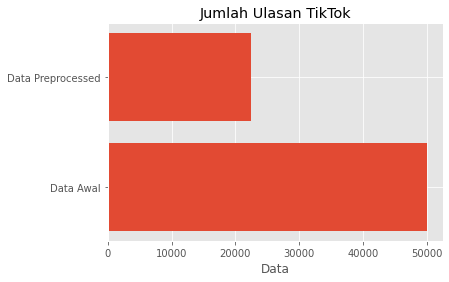

In [ ]:
import matplotlib.pyplot as plt

Data= ['Data Awal', 'Data Preprocessed']
Jumlah = [50000,22424]

plt.style.use('ggplot')

plt.barh(Data,Jumlah)
plt.title('Jumlah Data Ulasan TikTok')
plt.ylabel('')
plt.xlabel('Data')
plt.show()

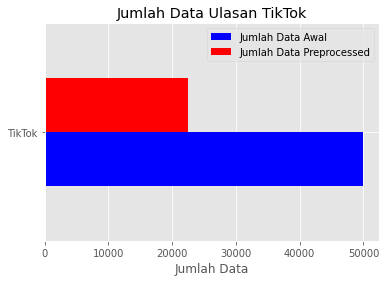

<Figure size 1800x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
   
data = {'Jumlah Data Awal' : [50000], 'Jumlah Data Preprocessed' : [22424] }

df = pd.DataFrame(data,columns=['Jumlah Data Awal','Jumlah Data Preprocessed'], index = ['TikTok'])

df.plot.barh(color =['blue', 'red'])

plt.title('Jumlah Data Ulasan TikTok')
plt.ylabel('')
plt.xlabel('Jumlah Data')


f = plt.figure()
f.set_figwidth(25)
f.set_figheight(4)
plt.show()

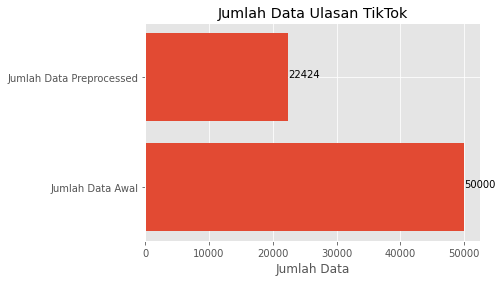

<Figure size 36000x72 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

Data = ['Jumlah Data Awal','Jumlah Data Preprocessed']
Jumlah = [50000,22424]
plt.style.use('ggplot')

for index, value in enumerate(Jumlah):
    plt.text(value, index,
             str(value)) 

plt.barh(Data,Jumlah)
plt.title('Jumlah Data Ulasan TikTok')
plt.ylabel('')
plt.xlabel('Jumlah Data')


    
    
f = plt.figure()
f.set_figwidth(500)
f.set_figheight(1)
plt.show()
